### Test several model to classify sms smishing

Import library

In [286]:
from os import path
from google.colab import drive
drive.mount('/content/drive')
#upload=files.upload()
#import os
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


In [0]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
import nltk
 
%matplotlib inline

Read csv file (*https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection*)

In [288]:
sms=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/spam.csv', encoding='latin-1') 
sms.head()
#sms=pd.read_csv(https://drive.google.com/file/d/17QYAMAQmARxQEnGNupHnkDXoNUAO8uCk/view?usp=sharing)#//

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Modify the columns
- drop "Unnamed"
- rename v1 and v2 to "label" and "message", respectively


In [0]:
sms = sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
sms = sms.rename(columns = {'v1':'label','v2':'message'})

In [290]:
sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

The label is grouped by ham and spam.
- count: total of spam or ham
- unique: ?
- top: top rank words of label
- frequency: number of certain words

Chcek any interesting things in dataset by caluating length of words


In [291]:
sms['length'] = sms['message'].apply(len)
sms.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc596dd0278>,
      dtype=object)

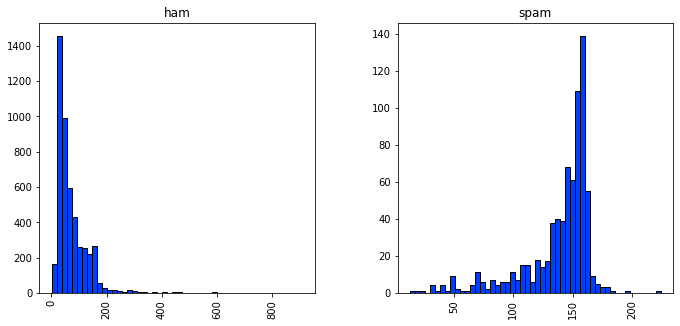

In [292]:
mpl.rcParams['patch.force_edgecolor'] = True
plt.style.use('seaborn-bright')
sms.hist(column='length', by='label', bins=50,figsize=(11,5))

Process and vertorize messages


In [0]:
text_feat = sms['message'].copy()

Remove punctuation and stopwords

In [0]:
def text_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation)) #to make mapping table
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)

There's no stopwords then download

In [295]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
text_feat = text_feat.apply(text_process)

In [0]:
vectorizer = TfidfVectorizer("english")

In [0]:
features = vectorizer.fit_transform(text_feat)

###  Classifiers and predictions

In [0]:
features_train, features_test, labels_train, labels_test = train_test_split(features, sms['label'], test_size=0.3, random_state=111)

Import and initializae classifiers

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [0]:
svc = SVC(kernel='sigmoid', gamma=1.0)
#svcr = SVC(kernel='relu',gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

Tuning classifiers hyperparameter

In [0]:
clfs = {'SVC' : svc, 'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}

In [0]:
def train_classifier(clf, feature_train, labels_train):    
    clf.fit(feature_train, labels_train)

In [0]:
def predict_labels(clf, features):
    return (clf.predict(features))

In [305]:
pred_scores = []
for k,v in clfs.items():

    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, accuracy_score(labels_test,pred)))
   # type( [accuracy_score(labels_test,pred)])
    print("k:", k, "\nv:", v, "\n[accuracy_score(labels_test,pred)]:",accuracy_score(labels_test,pred))


k: SVC 
v: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 
[accuracy_score(labels_test,pred)]: 0.9784688995215312
k: KN 
v: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=49, p=2,
                     weights='uniform') 
[accuracy_score(labels_test,pred)]: 0.9246411483253588
k: NB 
v: MultinomialNB(alpha=0.2, class_prior=None, fit_prior=True) 
[accuracy_score(labels_test,pred)]: 0.9844497607655502
k: DT 
v: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
 

In [0]:
df = pd.DataFrame(pred_scores,columns=['Classifier','Score']).set_index('Classifier', drop=True)


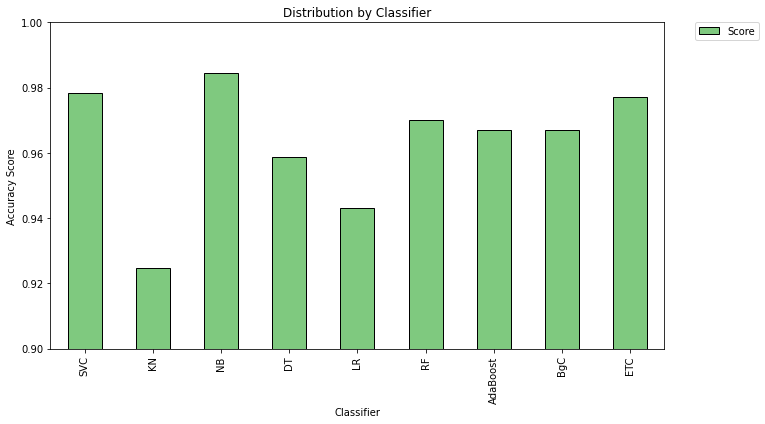

In [307]:
df.plot(kind='bar', ylim=(0.9,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Stemmer

It is said that stemming short messages does no goot or even harm predictions. Let's try this out.

**Define** our stemmer function

In [0]:
def stemmer (text):
    text = text.split()
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

In [0]:
text_feat = text_feat.apply(stemmer)

In [0]:
features = vectorizer.fit_transform(text_feat)

In [0]:
features_train, features_test, labels_train, labels_test = train_test_split(features, sms['label'], test_size=0.3, random_state=111)

In [312]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, accuracy_score(labels_test,pred)))
pred_scores

[('SVC', 0.9784688995215312),
 ('KN', 0.9276315789473685),
 ('NB', 0.9850478468899522),
 ('DT', 0.9599282296650717),
 ('LR', 0.9467703349282297),
 ('RF', 0.9748803827751196),
 ('AdaBoost', 0.9700956937799043),
 ('BgC', 0.9688995215311005),
 ('ETC', 0.9778708133971292)]

In [0]:
df2 = pd.DataFrame(pred_scores, columns=['Classifier','Score2']).set_index('Classifier', drop=True)


In [314]:
df = pd.concat([df,df2],axis=1)
df

,Score,Score2
Classifier,,
SVC,0.978469,0.978469
KN,0.924641,0.927632
NB,0.984450,0.985048
DT,0.958732,0.959928
LR,0.943182,0.946770
RF,0.970096,0.974880
AdaBoost,0.967105,0.970096
BgC,0.967105,0.968900
ETC,0.977273,0.977871


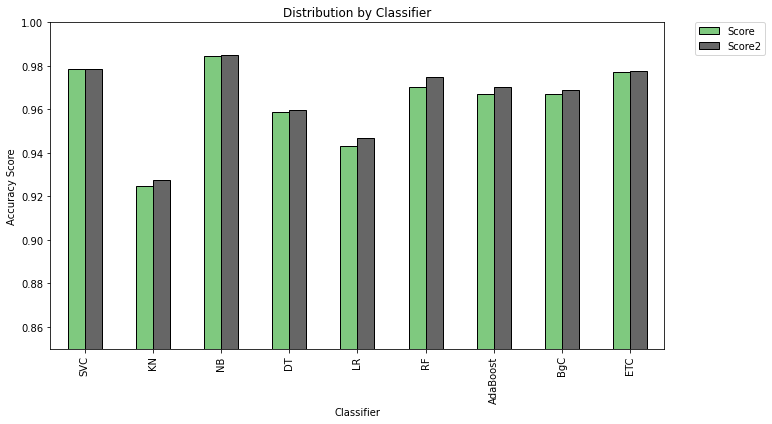

In [315]:
df.plot(kind='bar', ylim=(0.85,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Let's append our message length feature to the matrix we fit into our classifiers

In [323]:
lf = sms['length'].values
lf

array([111,  29, 155, ...,  57, 125,  26])

In [0]:
newfeat = np.hstack((features.todense(),lf[:, None]))

In [0]:
features_train, features_test, labels_train, labels_test = train_test_split(newfeat, sms['label'], test_size=0.3, random_state=111)

In [0]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, accuracy_score(labels_test,pred)))

In [328]:
df3 = pd.DataFrame(pred_scores,columns=['Classifier','Score3']).set_index('Classifier', drop=True)
df = pd.concat([df,df3],axis=1)
df

,Score,Score2,Score3
Classifier,,,
SVC,0.978469,0.978469,0.861244
KN,0.924641,0.927632,0.881579
NB,0.984450,0.985048,0.982656
DT,0.958732,0.959928,0.957536
LR,0.943182,0.946770,0.954545
RF,0.970096,0.974880,0.975478
AdaBoost,0.967105,0.970096,0.961722
BgC,0.967105,0.968900,0.962321
ETC,0.977273,0.977871,0.975478


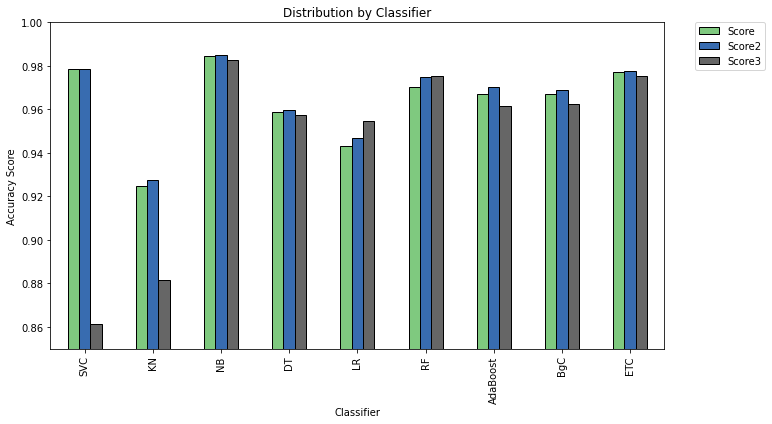

In [329]:
df.plot(kind='bar', ylim=(0.85,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Voting classifier

In [0]:
from sklearn.ensemble import VotingClassifier

In [0]:
eclf = VotingClassifier(estimators=[('BgC', bc), ('ETC', etc), ('RF', rfc), ('Ada', abc)], voting='soft')

In [332]:
eclf.fit(features_train,labels_train)

VotingClassifier(estimators=[('BgC',
                              BaggingClassifier(base_estimator=None,
                                                bootstrap=True,
                                                bootstrap_features=False,
                                                max_features=1.0,
                                                max_samples=1.0, n_estimators=9,
                                                n_jobs=None, oob_score=False,
                                                random_state=111, verbose=0,
                                                warm_start=False)),
                             ('ETC',
                              ExtraTreesClassifier(bootstrap=False,
                                                   ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
         

In [0]:
pred = eclf.predict(features_test)

In [334]:
print(accuracy_score(labels_test,pred))

0.979066985645933
